In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#advertising data
# read data into a DataFrame
data = pd.read_csv('Downloads\Advertising.csv',index_col=0)
data.head(20)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [3]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

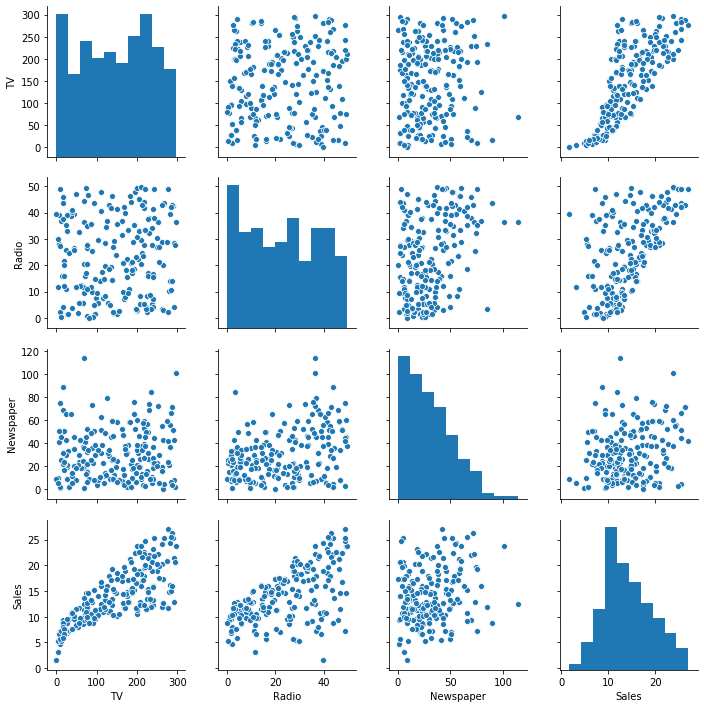

In [4]:
sns.pairplot(data)

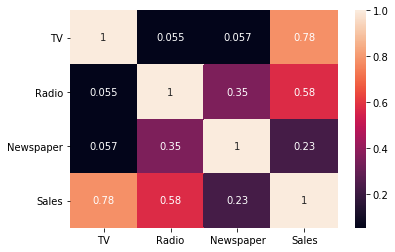

In [5]:
sns.heatmap(data.corr(),annot=True)

In [6]:
data.shape

(200, 4)

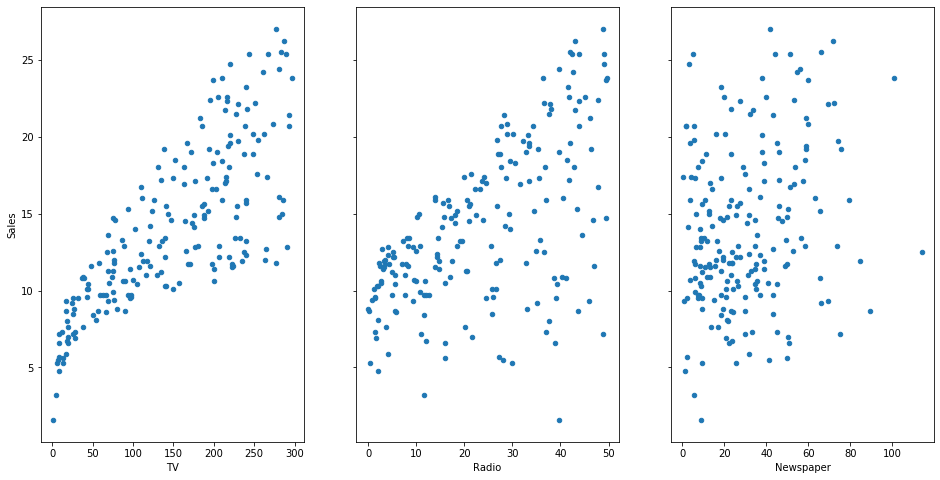

In [7]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)#sharey true will indicate y scale one time only to the first plot
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

# Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

y=β0+β1x

What does each term represent?

y is the response

x is the feature

β0 is the intercept

β1 is the coefficient for x

Together, β0 and β1 are called the model coefficients. 

To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Estimating ("Learning") Model Coefficients
Generally speaking, coefficients are estimated using the least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):



What elements are present in the diagram?

The black dots are the observed values of x and y.
The blue line is our least squares line.
The red lines are the residuals, which are the distances between the observed values and the least squares line.
How do the model coefficients relate to the least squares line?

β0 is the intercept (the value of y when x=0)
β1 is the slope (the change in y divided by change in x)
Here is a graphical depiction of those calculations:



Let's use Statsmodels to estimate the model coefficients for the advertising data:

In [8]:
import statsmodels.formula.api as smf


In [9]:
lm=smf.ols(formula="Sales ~ TV",data=data).fit()

In [10]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

# Interpreting Model Coefficients

How do we interpret the TV coefficient (β1)?

A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.
Note that if an increase in TV ad spending was associated with a decrease in sales, β1 would be negative.

In [11]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [12]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

# Plotting the Least Squares Line
Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [13]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [14]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

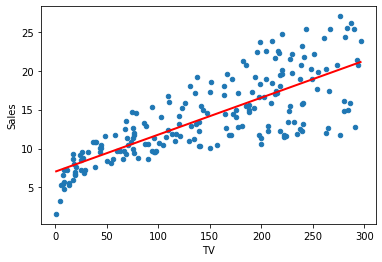

In [15]:
# first, plot the observed data
#data.plot(kind='scatter', x='TV', y='Sales')
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
#plt.plot(data.TV, lm.predict(data.TV), c='red', linewidth=2)
plt.plot(X_new, lm.predict(X_new), c='red', linewidth=2)


# Confidence in our Model
Question: Is linear regression a high bias/low variance model, or a low bias/high variance model?

Answer: High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is confidence intervals. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient.

In [16]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


# null hypothesis: 
There is no relationship between TV ads and Sales (and thus β1 equals zero)
# alternative hypothesis: 
There is a relationship between TV ads and Sales (and thus β1 is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval does not include zero. Conversely, the p-value represents the probability that the coefficient is actually zero:

In [17]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we believe that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

In [18]:
lm.rsquared

0.611875050850071

# Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

y=β0+β1x1+...+βnxn
Each x represents a different feature, and each feature has its own coefficient. In this case:

y=β0+β1×TV+β2×Radio+β3×Newspaper
Let's use Statsmodels to estimate these coefficients:

In [19]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [20]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.58e-96
Time:                        17:47:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# What are a few key things we learn from this output?

TV and Radio have significant p-values, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
TV and Radio ad spending are both positively associated with Sales, whereas Newspaper ad spending is slightly negatively associated with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
This model has a higher R-squared (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

# Feature Selection
How do I decide which features to include in a linear model? Here's one idea:

Try different models, and only keep predictors in the model if they have small p-values.
Check whether the R-squared value goes up when you add new predictors.
What are the drawbacks to this approach?

Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are pure noise, 5 of them (on average) will still be counted as significant.
R-squared is susceptible to overfitting, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [21]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [22]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

# R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

# There is alternative to R-squared called adjusted R-squared that penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.

So is there a better approach to feature selection? Cross-validation. It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best generalize to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.



In [24]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [31]:
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

[('TV', 0.045764645455397615), ('Radio', 0.18853001691820456), ('Newspaper', -0.0010374930424763272)]


In [39]:
# predict for a new observation
array=[100, 25, 25]
array=np.reshape(array,(1,-1))
array
lm.predict(array)

array([12.20266701])

In [40]:
# calculate the R-squared
lm.score(X, y) #Note that p-values and confidence intervals are not (easily) accessible through scikit-learn.

0.8972106381789521